<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Описание данных**

**Признаки**

* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

**Целевой признак**

* Exited — факт ухода клиента

## Подготовка данных

In [49]:
# Загружаем библиотеки
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

In [51]:
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

In [52]:
# загрузка данных
data = pd.read_csv('/datasets/Churn.csv')

In [53]:
# размер датасета
data.shape

(10000, 14)

In [54]:
#информация по столбцам
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [55]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [56]:
data.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3.0,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4.0,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2.0,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7.0,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2.0,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [57]:
#  названия столбцов
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

**Наблюдения:**

* Наличие в датасете излишних данных (столбцы RowNumber, CustomerId, Surname)
* NaN-значения в столбце Tenure
* Категориальные признаки - столбцы Geography и Gender

In [58]:
# приведем названия в порядок 
data = data.rename(columns={'RowNumber':'Row_Number', 'CustomerId':'Customer_Id', 'CreditScore':'Credit_Score',
       'NumOfProducts':'Num_Of_Products', 'HasCrCard':'Has_Cr_Card',
       'IsActiveMember':'Is_Active_Member', 'EstimatedSalary':'Estimated_Salary'})

In [59]:
# приводим названия к нижниму регистру
data.columns = data.columns.str.lower()

In [60]:
# проверка
data.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [61]:
# удаляем лишнюю информацию 
data.drop(columns='surname', inplace=True)
data.drop(columns='row_number', inplace=True)
data.drop(columns='customer_id', inplace=True)

**Обработка пропусков**

In [62]:
# посмотрим пропуски
data.isna().sum()

credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

In [63]:
# посмотрим медиану и среднее
data['tenure'].median(), data['tenure'].mean()

(5.0, 4.997690023099769)

In [64]:
# заменим пропуски на медианное значение
data['tenure'] = data['tenure'].fillna(data['tenure'].median())

**Дубликаты**

In [65]:
data.duplicated().sum()

0

In [66]:
# уникальные значения в столбце "Страна проживания" 
data['geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [67]:
# уникальные значения в столбце "Пол"
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

**Задействуем технику прямого кодирования, чтобы преобразовать категориальные признаки в численные.**

In [68]:
data_ohe = pd.get_dummies(data, drop_first=True)

In [69]:
data_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


**Разобьем получившийся датасет на 3 выборки - обучающую, валидационную и тестовую.**

In [70]:
target = data_ohe['exited']
features = data_ohe.drop('exited', axis=1)

features_train, features_rest, target_train, target_rest = train_test_split(features, target, test_size=.4, random_state=666)
features_valid, features_test, target_valid, target_test = train_test_split(features_rest, target_rest, test_size=.5, random_state=666)

In [71]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)


**Масштабируем признаки методом стандартизации.**

In [72]:
numeric = ['credit_score', 'age', 'balance', 'estimated_salary', 'tenure', 'num_of_products']

In [73]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

/tmp/ipykernel_129/1706106210.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_129/1706106210.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

**Вывод:**

* ознакомились с данными,
* выявили особенности датасета:
  наличие в датасете излишних данных (столбцы RowNumber, CustomerId, Surname) - избавились
* NaN-значения в столбце Tenure - заменили на 0
* категориальные признаки - столбцы Geography и Gender
* преобразовали категориальные признаки в численные с помощью техники прямого кодирования One-Hot Encoding,
* разбили получившийся датасет на 3 выборки - обучающую, валидационную и тестовую,
  масштабировали признаки методом стандартизации.

## Исследование задачи

**Обучим модели и измерим accuracy.**

In [74]:
model = LogisticRegression(random_state=666,solver = 'liblinear')
model.fit(features_train, target_train)
predicted_valid_lr = pd.Series(model.predict(features_valid))
model.score(features_valid, target_valid)

0.8135

In [75]:
model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=666)
model.fit(features_train, target_train)
predicted_valid_forest = pd.Series(model.predict(features_valid))
model.score(features_valid, target_valid)

0.8675

**Доля правильных ответов — 86%. Нам необходимо понять, хороший ли это результат.**

**Исследуем целевой признак. Чтобы оценить адекватность модели, проверим, как часто в целевом признаке Exited встречается класс «1» или «0».**

0    0.7963
1    0.2037
Name: exited, dtype: float64


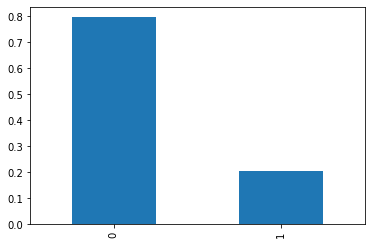

In [76]:
class_frequency = data['exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');

**Классы несбалансированы. Видим, что клиенты уходят в 20% процентах случаев, т.е. положительный класс меньше отрицательного в 4 раза.**

**Проанализируем частоты классов в результатах предсказаний обеих моделей.**

0    0.93
1    0.07
dtype: float64


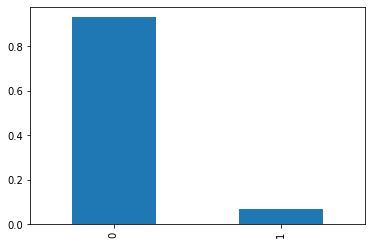

In [77]:
class_frequency_lr = predicted_valid_lr.value_counts(normalize=True)
print(class_frequency_lr)
class_frequency_lr.plot(kind='bar');

0    0.896
1    0.104
dtype: float64


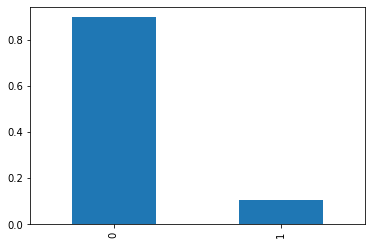

In [78]:
class_frequency_forest = predicted_valid_forest.value_counts(normalize=True)
print(class_frequency_forest)
class_frequency_forest.plot(kind='bar');

**Модели предсказывают более оптимистичный расклад.**

**Сравним их работу с константной моделью.**

In [79]:
target_pred_constant = pd.Series(0, target.index)
accuracy_score(target, target_pred_constant)

0.7963

**Все же построенные модели предсказывают уход клиентов лучше, чем константная модель, они адекватны. Но можно еще улучшить результат.**

**Применим F1-меру (среднее гармоническое полноты и точности), чтобы оценить качество прогноза положительного класса у моделей.**

In [80]:
f1_score(target_valid, predicted_valid_lr)

0.29222011385199237

In [81]:
f1_score(target_valid, predicted_valid_forest)

0.5546218487394957

**Вывод:**

* исследовали баланс классов - классы несбалансированы,
* выяснили, что клиенты уходят в 20% процентах случаев, те положительный класс меньше отрицательного в 4 раза,
* изучили модели без учёта дисбаланса
* выяснили, что результат работы модели случайного леса лучше (возможно, только пока).
* Постараемся достичь F1 не менее 0.59.

## Борьба с дисбалансом

**class_weight**
* сбалансируем классы с помощью аргумента class_weight.

In [82]:
model = LogisticRegression(random_state=666, solver = 'liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid_lr = pd.Series(model.predict(features_valid))
f1_score(target_valid, predicted_valid_lr)

0.4784520668425682

In [83]:
model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=666, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid_forest = pd.Series(model.predict(features_valid))
f1_score(target_valid, predicted_valid_forest)

0.5913242009132421

Мера F1 выглядит намного лучше, у модели LogisticRegression она увеличилась почти в 2 раза.

**Уменьшение выборки**

Сделаем объекты частого класса (0) не такими частыми. Для этого напишем функцию downsample.

In [84]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=666)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=666)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=666)
    
    return features_downsampled, target_downsampled

In [85]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [86]:
model = LogisticRegression(random_state=666, solver = 'liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid_downsampled_lr = model.predict(features_valid)
f1_score(target_valid, predicted_valid_downsampled_lr)

0.47291487532244203

In [87]:
model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=666)
model.fit(features_downsampled, target_downsampled)
predicted_valid_downsampled_forest = model.predict(features_valid)
f1_score(target_valid, predicted_valid_downsampled_forest)

0.573982125124131

Уменьшение выборки дает результаты хуже. Попробуем изменить порог.

**Изменение порога**

Попробуем изменить значение порога и посмотрим, как изменится F1.

In [88]:
model = LogisticRegression(random_state=666, solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid_lr = model.predict_proba(features_valid)
probabilities_one_valid_lr = probabilities_valid_lr[:, 1]

In [89]:
#напишем функцию для автоматизации подсчета F1 при разном значении порога
def count_threshold (probabilities_one_valid):
    for threshold in np.arange(0, 0.6, 0.05):
        predicted_valid = probabilities_one_valid > threshold
        f1 = f1_score(target_valid, predicted_valid)
        print("Порог = {:.2f} | F1 = {:.3f}".format(
        threshold, f1))

In [90]:
count_threshold(probabilities_one_valid_lr)

Порог = 0.00 | F1 = 0.324
Порог = 0.05 | F1 = 0.348
Порог = 0.10 | F1 = 0.390
Порог = 0.15 | F1 = 0.433
Порог = 0.20 | F1 = 0.470
Порог = 0.25 | F1 = 0.461
Порог = 0.30 | F1 = 0.473
Порог = 0.35 | F1 = 0.445
Порог = 0.40 | F1 = 0.401
Порог = 0.45 | F1 = 0.351
Порог = 0.50 | F1 = 0.292
Порог = 0.55 | F1 = 0.253


In [91]:
model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=666)
model.fit(features_train, target_train)
probabilities_valid_forest = model.predict_proba(features_valid)
probabilities_one_valid_forest = probabilities_valid_forest[:, 1]

In [92]:
count_threshold(probabilities_one_valid_forest)

Порог = 0.00 | F1 = 0.324
Порог = 0.05 | F1 = 0.359
Порог = 0.10 | F1 = 0.439
Порог = 0.15 | F1 = 0.517
Порог = 0.20 | F1 = 0.574
Порог = 0.25 | F1 = 0.595
Порог = 0.30 | F1 = 0.609
Порог = 0.35 | F1 = 0.594
Порог = 0.40 | F1 = 0.567
Порог = 0.45 | F1 = 0.557
Порог = 0.50 | F1 = 0.555
Порог = 0.55 | F1 = 0.530


Изменение порога показывает результаты лучше, чем уменьшение выборки.

Для модели RandomForestClassifier найдем значения **n_estimators** и **max_depth**, при которых она будет показывать лучшие результаты.

In [93]:
for depth in range(5, 11, 1):
    model = RandomForestClassifier(random_state=666, n_estimators=20, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_train_def = model.predict(features_train)
    predictions_valid_def = model.predict(features_valid)
    print("Accuracy при max_depth =", depth)
    print("Обучающая выборка:", accuracy_score(target_train, predictions_train_def))
    print("Валидационная выборка:", accuracy_score(target_valid, predictions_valid_def))
    print()

Accuracy при max_depth = 5
Обучающая выборка: 0.8588333333333333
Валидационная выборка: 0.86

Accuracy при max_depth = 6
Обучающая выборка: 0.865
Валидационная выборка: 0.8615

Accuracy при max_depth = 7
Обучающая выборка: 0.869
Валидационная выборка: 0.863

Accuracy при max_depth = 8
Обучающая выборка: 0.8818333333333334
Валидационная выборка: 0.8675

Accuracy при max_depth = 9
Обучающая выборка: 0.8888333333333334
Валидационная выборка: 0.8655

Accuracy при max_depth = 10
Обучающая выборка: 0.9001666666666667
Валидационная выборка: 0.8605



In [94]:
for estim in range(40, 140, 20):
    model = RandomForestClassifier(random_state=666, n_estimators=estim, max_depth = 7)
    model.fit(features_train, target_train)
    predictions_train_def2 = model.predict(features_train)
    predictions_valid_def2 = model.predict(features_valid)
    print("Accuracy при n_estimators =", estim)
    print("Обучающая выборка:", accuracy_score(target_train, predictions_train_def2))
    print("Валидационная выборка:", accuracy_score(target_valid, predictions_valid_def2))
    print()

Accuracy при n_estimators = 40
Обучающая выборка: 0.8681666666666666
Валидационная выборка: 0.8625

Accuracy при n_estimators = 60
Обучающая выборка: 0.8708333333333333
Валидационная выборка: 0.8645

Accuracy при n_estimators = 80
Обучающая выборка: 0.8741666666666666
Валидационная выборка: 0.864

Accuracy при n_estimators = 100
Обучающая выборка: 0.874
Валидационная выборка: 0.8645

Accuracy при n_estimators = 120
Обучающая выборка: 0.8738333333333334
Валидационная выборка: 0.8645



**Вывод:**

* лучшие результаты показал способы борьбы с дисбалансом class_weight, применим его
* работать дальше будем с моделью RandomForestClassifier со значением n_estimators = 40 и max_depth = 9

## Тестирование модели

Обучим финальную модель и проверим её на тестовой выборке.

In [95]:
model_final = RandomForestClassifier(random_state=666, n_estimators=40, max_depth = 9, class_weight='balanced')
model_final.fit(features_train, target_train)
predicted_test = model_final.predict(features_test)
f1_score(target_test, predicted_test)

0.6122448979591836

Нужное значение F1-меры достигнуто.

Посчитаем площадь под ROC-кривой для модели (AUC-ROC), чтобы узнать, насколько сильно ее точность отличается от случайной.

In [96]:
probabilities_valid_final = model_final.predict_proba(features_valid)
probabilities_one_valid_final = probabilities_valid_final[:, 1]
roc_auc_score(target_test, probabilities_one_valid_final)

0.5124720949640884

Метрика AUC-ROC почти не отличается от значения для случайной модели (0.5). F1 оценила построенную модель выше.

Общий вывод
Ознакомились с данными и подготовили их к исследованию (преобразовали категориальные признаки в численные с помощью техники прямого кодирования One-Hot Encoding,разбили получившийся датасет на 3 выборки - обучающую, валидационную и тестовую, масштабировали признаки методом стандартизации).

Исследовали баланс классов - они оказались несбалансированы, изучили модели без учёта дисбаланса, выяснили, что результат работы модели случайного леса лучше.

Применили 3 способа борбы с дисбалансом - аргумент class_weight, уменьшение выборки и изменение порога. Лучшие результаты показал способы борьбы с дисбалансом class_weight. Выявили лучшие значения n_estimators и max_depth для модели случайного леса.

Обучили финальную модель и проверили ее на тестовой выборке. Достигли значения F1 = 0.61. Исследовали метрику AUC-ROC - ее значение в данном случае почти не отличается от значения для случайной модели (0.5)

**Общий вывод**

Проведено прогнозирование оттока клиентов банка на основе исторических данных поведения клиентов.

* Построена модель с предельно большим значением F1-меры

* В рамках подготовки данных скорректированы наименования полей, проанализированы выбросы и дубликаты, проработаны проработаны пропуски.

* Категориальные признаки переведены в дамми переменные.

* Для борьбы с дисбалансом использована техника upsampling, что позволило поднять показатель f1 в 4.5 раза. Поэтому для дальнейшего прогноза были использованы данные features_upsampled, target_upsampled полученные с помощью техники upsampling.

* Проведен выбор лучшей модели для дальнейшего прогнозирования. Проанализированы модели LogisticRegression, DecisionTreeClassifier, RandomForestClassifier

* При сравнении базовых моделей, без дополнительных гиперпараметров, наилучший результат по F1 показала модель случайного леса. Далее будем использовать её для подбора оптимальных гиперпараметров. Наилучший показаталь модель случайного леса на тестовой модели f1 = 0.599 при гиперпараметрах Глубина = 11 Количество деревьев = 100

* Проведена проверка модели на адекватность, путём сравнения со случайной моделью.

* Доля правильных ответов accuracy в полученной модели 0.822 Доля правильных ответов accuracy в случайной модели 0.7885

* Проверка на адекватность показала, что доля правильных ответов accuracy в полученной модели выше чем аналогичный показатель случайной модели. Делаем вывод, что полученная нами модель является полезной.

* Дополнительно построена ROC - кривая, и измерена AUC-ROC = 0.8557

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*